<a href="https://colab.research.google.com/github/mehtas30/cancerAI/blob/main/cancerPredictionAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#30 attribute with radius, texture,perimenter,area,smoothness etc too see if cancer is benign or malignant
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv ("cancer_classification.csv")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
#visual graphs
import seaborn as sns
import matplotlib.pyplot as plt

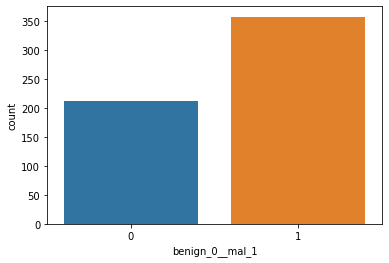

In [ ]:
sns.countplot(x="benign_0__mal_1", data=df) #0 benign, 1 malignant ideally want data to be even so AI can learn from both

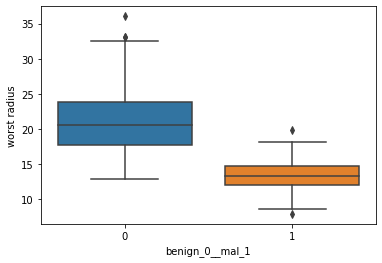

In [ ]:
sns.boxplot(x="benign_0__mal_1",y="worst radius", data=df) #not discrete data (using box plot)

In [ ]:
#data split
X= df.drop("benign_0__mal_1", axis=1).values #pandas to drop beningn0mal1 colunm (remove it) and assinging it to X
y=df["benign_0__mal_1"].values #stores actual labels
y.shape #array shape

(569,)

In [ ]:

X_train.shape
X_test.shape

(426, 30)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=101)#25% as "exam", random state means same test for every computer it runs

In [ ]:
#Data normalization : takes range of values and squishes them into 0-1 for faster processing
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
scaler.fit(X_train) #stores ranges for all colunms

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)#actually normalizing them (divides by the range found)
#y dataset is already 0,1


In [ ]:
#architecture
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout


In [ ]:
model= Sequential()
model.add(Dense(units=30,activation='relu')) #make layers match number of colunms in x train: input layer
model.add(Dense(units=15,activation='relu')) #units can be chosen depending on how much time you want to spend: hidden layer
model.add(Dense(units=1,activation='sigmoid')) #output layer 


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam') #loss function for binary (malignent or benign), adam is for modifing weights of each connection for accuracy


In [ ]:
#model training

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )#x question, y answer, epoch=600times, test question/asnwers, shows output


Epoch 1/600
14/14 [==============================] - 2s 14ms/step - loss: 0.7086 - val_loss: 0.6749
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6680 - val_loss: 0.6421
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6323 - val_loss: 0.6075
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5990 - val_loss: 0.5694
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5557 - val_loss: 0.5266
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4993 - val_loss: 0.4766
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4631 - val_loss: 0.4190
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4139 - val_loss: 0.3617
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3668 - val_loss: 0.3113
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3144 - val_loss: 0.2727
Epoch 11

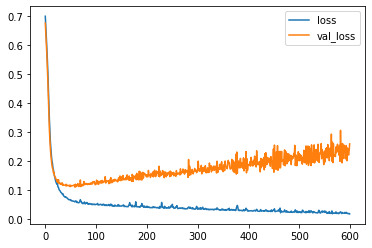

In [ ]:
model_loss= pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
predicitions=model.predict_classes(X_test) #tries to predict test
from sklearn.metrics import classification_report
print (classification_report(y_test,predicitions)) #compare real predicition with ai

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        55
           1       0.99      0.91      0.95        88

    accuracy                           0.94       143
   macro avg       0.93      0.95      0.93       143
weighted avg       0.94      0.94      0.94       143



/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
